# Análise exploratória dos times da Premier League

### Introdução

Os dados foram retirados do Kaggle e podem ser encontrados no link: https://www.kaggle.com/datasets/panaaaaa/english-premier-league-and-championship-full-dataset

Tratam-se de dados retirados sobre as rodadas da Premier Legue (Liga Inglesa de futebol) das temporadas 1993-94 a 2024-2025

#### **Sobre os dados**


1. Date, A data em que a partida foi disputada
2. Season, A temporada de futebol em que a partida ocorreu (geralmente abrange dois anos, por exemplo, 2023-24)
3. HomeTeam, O time que jogou em seu próprio estádio
4. AwayTeam, O time visitante
5. FTH Goals, Total de gols marcados pelo time mandante ao final da partida
6. FTA Goals, Total de gols marcados pelo time visitante ao final da partida
7. FT Result, Resultado ao final da partida (H para vitória do mandante, A para vitória do visitante, D para empate)
8. HTH Goals, Gols marcados pelo time mandante até o fim do primeiro tempo
9. HTA Goals, Gols marcados pelo time visitante até o fim do primeiro tempo
10. HT Result, Situação ao término do primeiro tempo (H para mandante à frente, A para visitante à frente, D para empate)
11. Referee, Nome do árbitro que apitou a partida
12. H Shots, Total de finalizações tentadas pelo time mandante
13. A Shots, Total de finalizações tentadas pelo time visitante
14. H SOT, Finalizações do mandante que foram no alvo
15. A SOT, Finalizações do visitante que foram no alvo
16. H Fouls, Número de faltas cometidas pelo time mandante
17. A Fouls, Número de faltas cometidas pelo time visitante
18. H Corners, Total de escanteios a favor do time mandante
19. A Corners, Total de escanteios a favor do time visitante
20. H Yellow, Cartões amarelos exibidos aos jogadores do time mandante
21. A Yellow, Cartões amarelos exibidos aos jogadores do time visitante
22. H Red, Cartões vermelhos exibidos aos jogadores do time mandante
23. A Red, Cartões vermelhos exibidos aos jogadores do time visitante
24. Display\_Order, Código numérico usado para ordenar ou apresentar as partidas
25. League, A competição ou liga em que a partida foi disputada



### Importando as bibliotecas

In [2]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

### Lendo os datasets presentes

In [6]:
results = pd.read_csv('C:/dbs/premier_league_data/England CSV.csv')

print(f'O dataset results.csv tem {results.shape[0]} linhas e {results.shape[1]} colunas')

results.head()

O dataset results.csv tem 12153 linhas e 25 colunas


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

In [10]:
missing_total = results.groupby('Season') \
                       .apply(lambda grp: grp.isnull().sum(axis=1).sum())

missing_total

Season
1993/94    7392
1994/95    7392
1995/96    4940
1996/97    4940
1997/98    4940
1998/99    4940
1999/00    4940
2000/01       0
2001/02       0
2002/03       0
2003/04       0
2004/05       0
2005/06       0
2006/07       0
2007/08       0
2008/09       0
2009/10       0
2010/11       0
2011/12       0
2012/13       0
2013/14       0
2014/15       0
2015/16       0
2016/17       0
2017/18       0
2018/19       0
2019/20       0
2020/21       0
2021/22       0
2022/23       0
2023/24       0
2024/25       0
dtype: int64

Como as temporadas de 93/94 a 99/00 possuem muitos valores faltantes, especialmente alguns que serão utilizados para definir algumas métricas, optei por excluir estes valores.

In [13]:
seasons_to_delete = missing_total[missing_total > 0].index.tolist()

results = results[~results['Season'].isin(seasons_to_delete)]

results['Season'].unique()

array(['2024/25', '2023/24', '2022/23', '2021/22', '2020/21', '2019/20',
       '2018/19', '2017/18', '2016/17', '2015/16', '2014/15', '2013/14',
       '2012/13', '2011/12', '2010/11', '2009/10', '2008/09', '2007/08',
       '2006/07', '2005/06', '2004/05', '2003/04', '2002/03', '2001/02',
       '2000/01'], dtype=object)

In [15]:
results.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')

In [17]:
results.rename(columns={
    'FTH Goals': 'homeT_goals',
    'FTA Goals': 'awayT_goals',
    'HTH Goals': 'halftimeH_goals',
    'HTA Goals': 'halftimeA_goals',
    'FT Result': 'final_result',
    'HT Result': 'halftime_result',
    'H Shots': 'homeT_shots',
    'A Shots': 'awayT_shots',
    'H SOT': 'homeT_shots_on_goal', 
    'A SOT': 'awayT_shots_on_goal',
    'H Fouls': 'homeT_fouls',
    'A Fouls': 'awayT_fouls',
    'H Corners': 'homeT_corners', 
    'A Corners': 'awayT_corners', 
    'H Yellow': 'homeT_yellow_cards', 
    'A Yellow': 'awayT_yellow_cards', 
    'H Red': 'homeT_red_cards', 
    'A Red': 'awayT_red_cards',
}, inplace=True)

results.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'homeT_goals', 'awayT_goals',
       'final_result', 'halftimeH_goals', 'halftimeA_goals', 'halftime_result',
       'Referee', 'homeT_shots', 'awayT_shots', 'homeT_shots_on_goal',
       'awayT_shots_on_goal', 'homeT_fouls', 'awayT_fouls', 'homeT_corners',
       'awayT_corners', 'homeT_yellow_cards', 'awayT_yellow_cards',
       'homeT_red_cards', 'awayT_red_cards', 'Display_Order', 'League'],
      dtype='object')

### Análise Univariada

In [20]:
results.describe()

,homeT_goals,awayT_goals,halftimeH_goals,halftimeA_goals,homeT_shots,awayT_shots,homeT_shots_on_goal,awayT_shots_on_goal,homeT_fouls,awayT_fouls,homeT_corners,awayT_corners,homeT_yellow_cards,awayT_yellow_cards,homeT_red_cards,awayT_red_cards,Display_Order
count,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9.329000e+03
mean,1.536178,1.179333,0.687641,0.518491,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.012332e+07
std,1.305748,1.157003,0.835261,0.734551,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,7.106400e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000082e+07
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.006092e+07
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.012111e+07
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.018121e+07
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07


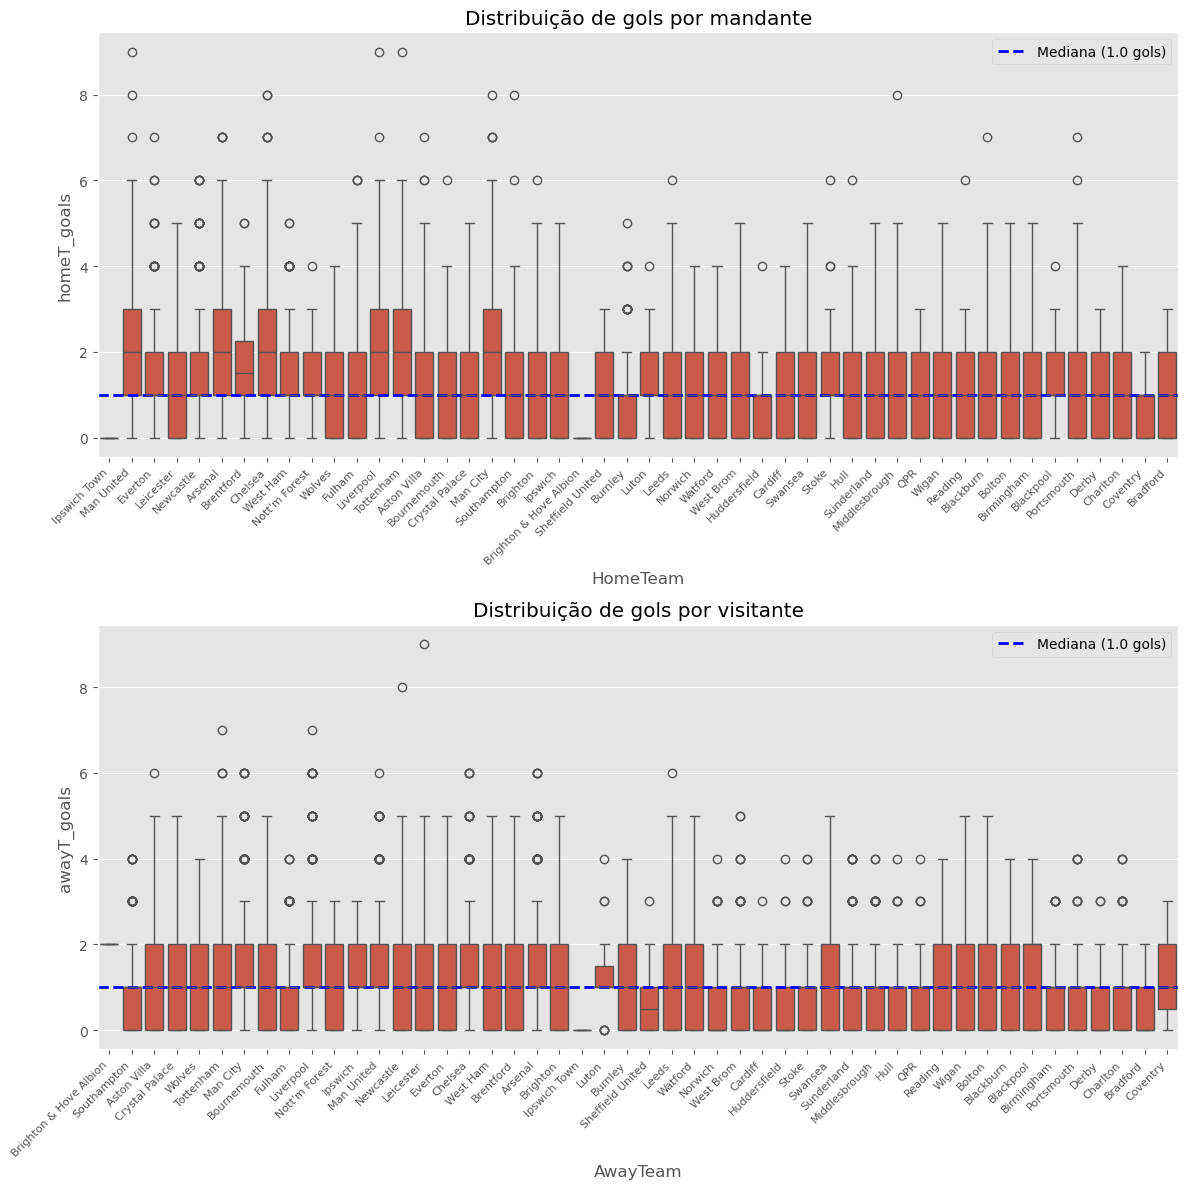

<Figure size 640x480 with 0 Axes>

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(12,12))

ax1 = sns.boxplot(data=results, x='HomeTeam', y='homeT_goals', ax=axes[0])
ax1.set_title('Distribuição de gols por mandante')

median_h_goals = np.median(results['homeT_goals'])

ax1.axhline(median_h_goals,
           color='blue',
           linestyle='--',
           linewidth=2,
           label=f'Mediana ({median_h_goals:.1f} gols)')

ax2 = sns.boxplot(data=results, x='AwayTeam', y='awayT_goals', ax=axes[1])
ax2.set_title('Distribuição de gols por visitante')

median_a_goals = np.median(results['awayT_goals'])

ax2.axhline(median_a_goals,
           color='blue',
           linestyle='--',
           linewidth=2,
           label=f'Mediana ({median_a_goals:.1f} gols)')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)               # gira 90°
    ax.set_xticklabels(ax.get_xticklabels(), 
                       ha='right',                       # alinha à direita
                       fontsize=8)
    ax.legend()
    

plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.show()

plt.savefig("boxplots_gols.svg", dpi=400)

Apesar da quantidade de gols serem parecidas para times mandantes e visitantes, vemos que a média de gols por partida é diferente para cada um. A média de gols por partida para o time que está jogando em casa é de 1.53 gols aproximadamente, enquanto para o time visitante é de 1.17 aproximadamente. Apesar da diferença, não se nota uma expressiva diferença entre jogar em casa e não para a quantidade de gols feitos.

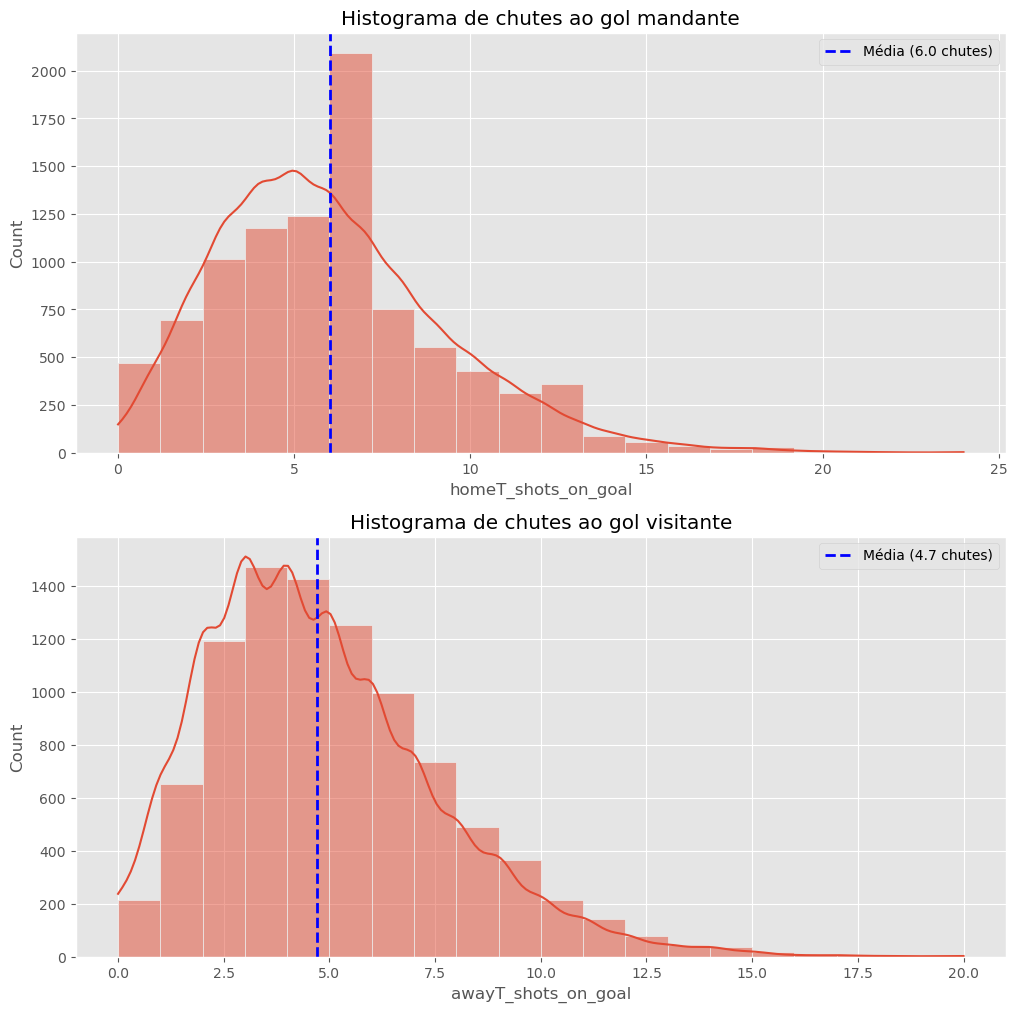

<Figure size 640x480 with 0 Axes>

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

ax1 = sns.histplot(data=results, x='homeT_shots_on_goal', kde=True, bins=20, ax=axes[0])
ax1.set_title('Histograma de chutes ao gol mandante')

mean_h_sot = np.mean(results['homeT_shots_on_goal'])

ax1.axvline(mean_h_sot,
           color='blue',
           linestyle='--',
           linewidth=2,
           label=f'Média ({mean_h_sot:.1f} chutes)')

ax2 = sns.histplot(data=results, x='awayT_shots_on_goal', kde=True, bins=20, ax=axes[1])
ax2.set_title('Histograma de chutes ao gol visitante')

mean_a_sot = np.mean(results['awayT_shots_on_goal'])

ax2.axvline(mean_a_sot,
           color='blue',
           linestyle='--',
           linewidth=2,
           label=f'Média ({mean_a_sot:.1f} chutes)')

for ax in axes:
    ax.legend()
    

plt.show()

plt.savefig("histogram_gols.svg", dpi=400)

Assim como no caso dos gols por partida de cada grupo (mandante e visitante), não é possível enxergar uma disparidade tão alta entre a quantidade de chutes ao gol pelos times. Portanto, observa-se uma diferença de 1.3 chutes entre mandantes (6 chutes em média) e visitantes (4.7 chutes em média).

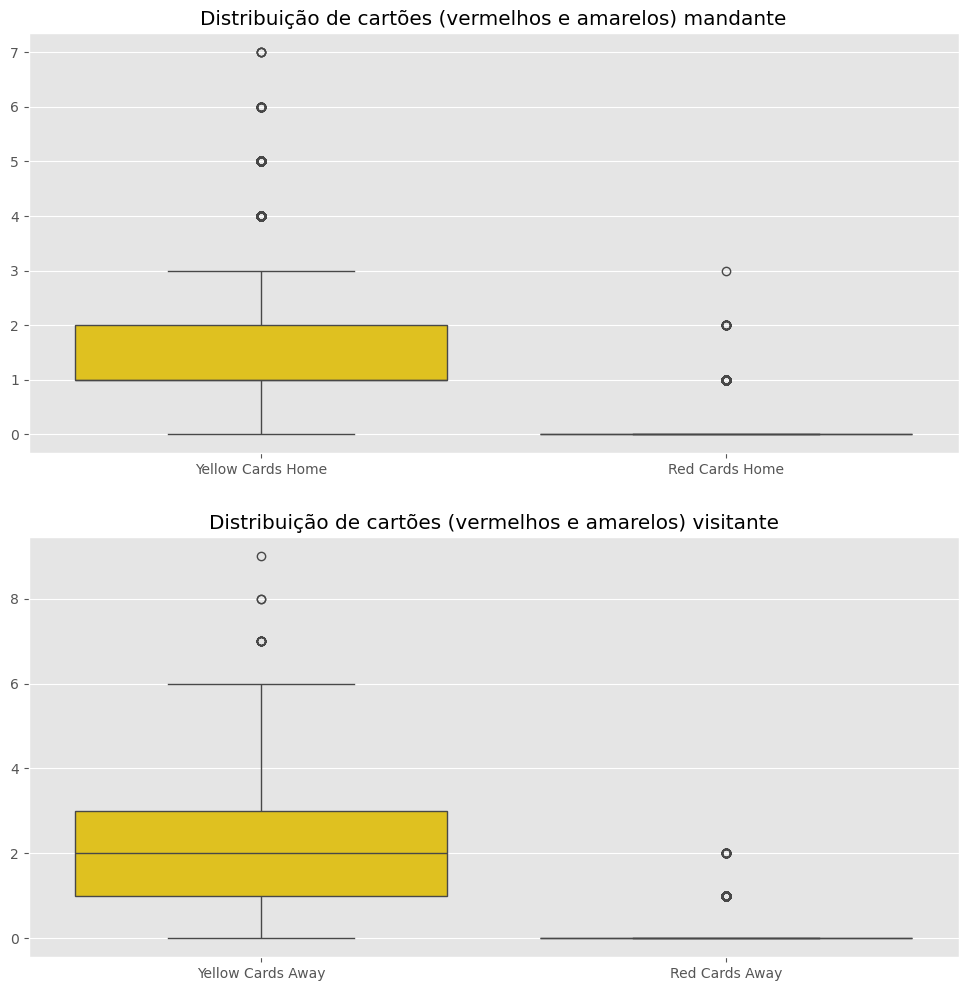

In [64]:
import matplotlib.pyplot as plt

import seaborn as sns

# seleciona só as duas colunas
df = results[['homeT_yellow_cards','homeT_red_cards', 'awayT_yellow_cards', 'awayT_red_cards']] \
      .rename(columns={
         'homeT_yellow_cards':'Yellow Cards Home',
         'homeT_red_cards':  'Red Cards Home',
         'awayT_yellow_cards': 'Yellow Cards Away',
         'awayT_red_cards': 'Red Cards Away'
      })

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

ax1 = sns.boxplot(data=df[['Yellow Cards Home','Red Cards Home']], palette=['gold', 'crimson'], label='dist_home_cards', ax = axes[0])
ax1.set_title('Distribuição de cartões (vermelhos e amarelos) mandante')
ax1.set_xlabel('')
ax1.set_ylabel('')


ax2 = sns.boxplot(data=df[['Yellow Cards Away', 'Red Cards Away']], palette=['gold', 'crimson'], label='dist_home_cards', ax = axes[1])
ax2.set_title('Distribuição de cartões (vermelhos e amarelos) visitante')
ax2.set_xlabel('')
ax2.set_ylabel('')


plt.savefig("boxplots_cartoes.svg", dpi=400)

Apesar dos grupos de times mandantes e visitantes possuirem médias parecidas para cartões amarelos (1.46 e 1.78 respectivamente), suas medianas diferem em 1, isto é 50% dos jogos analisado possuem ao menos 1 cartão amarelo para o time jogando em casa e 2 cartões amarelos para o time visitante.

In [31]:
number_wins = results['final_result'].value_counts(1)

number_wins

final_result
H    0.458570
A    0.293493
D    0.247937
Name: proportion, dtype: float64

Apesar de em estatísticas gerais não haverem grandes diferenças para times que jogam em casa ou não, nota-se que cerca de 45% da partidas tem como resultado o time mandante vencedor. Há vários fatores há se considerar para entender porque times tem mais sucesso jogando em casa como torcida, familiaridade com gramado e outros.

In [34]:
results['home_pts'] = results['final_result'].map({'H':3,'D':1,'A':0})
results['away_pts'] = results['final_result'].map({'H':0,'D':1,'A':3})


In [36]:
home_data = results.copy().rename(
    columns = {
        "HomeTeam": "team",
        "home_pts": "points"
    }
)

away_data = results.copy().rename(
    columns = {
        "AwayTeam": "team",
        "away_pts": "points"
    }
)

print("Home_data columns:", home_data.columns.tolist())
print("Away_data columns:", away_data.columns.tolist())


df_long = pd.concat([home_data, away_data], ignore_index = True)

stats = (
    df_long.groupby(['Season', 'team'])
    .agg(
        wins = ('points', lambda s: (s==3).sum()),
        draws = ('points', lambda s: (s==1).sum()),
        losses = ('points', lambda s: (s==0).sum()),
        goals = ('homeT_goals', 'sum'),
        goals_against = ('awayT_goals', 'sum'),
        avg_goals = ('homeT_goals', 'mean'),
        avg_goals_against = ('awayT_goals', 'mean'),
        avg_home_shots = ('homeT_shots', 'mean'),
        avg_shots_against = ('awayT_shots', 'mean'),
        avg_home_sot = ('homeT_shots_on_goal', 'mean'),
        avg_away_sot = ('awayT_shots_on_goal', 'mean')
    )
    .reset_index()
)

stats

Home_data columns: ['Date', 'Season', 'team', 'AwayTeam', 'homeT_goals', 'awayT_goals', 'final_result', 'halftimeH_goals', 'halftimeA_goals', 'halftime_result', 'Referee', 'homeT_shots', 'awayT_shots', 'homeT_shots_on_goal', 'awayT_shots_on_goal', 'homeT_fouls', 'awayT_fouls', 'homeT_corners', 'awayT_corners', 'homeT_yellow_cards', 'awayT_yellow_cards', 'homeT_red_cards', 'awayT_red_cards', 'Display_Order', 'League', 'points', 'away_pts']
Away_data columns: ['Date', 'Season', 'HomeTeam', 'team', 'homeT_goals', 'awayT_goals', 'final_result', 'halftimeH_goals', 'halftimeA_goals', 'halftime_result', 'Referee', 'homeT_shots', 'awayT_shots', 'homeT_shots_on_goal', 'awayT_shots_on_goal', 'homeT_fouls', 'awayT_fouls', 'homeT_corners', 'awayT_corners', 'homeT_yellow_cards', 'awayT_yellow_cards', 'homeT_red_cards', 'awayT_red_cards', 'Display_Order', 'League', 'home_pts', 'points']


,Season,team,wins,draws,losses,goals,goals_against,avg_goals,avg_goals_against,avg_home_shots,avg_shots_against,avg_home_sot,avg_away_sot
0,2000/01,Arsenal,20,10,8,70,31,1.842105,0.815789,13.157895,9.052632,6.921053,4.394737
1,2000/01,Aston Villa,13,15,10,50,39,1.315789,1.026316,10.578947,8.394737,5.000000,3.973684
2,2000/01,Bradford,5,11,22,61,39,1.605263,1.026316,13.342105,9.921053,6.526316,5.315789
3,2000/01,Charlton,14,10,14,69,38,1.815789,1.000000,12.526316,9.657895,6.368421,5.157895
4,2000/01,Chelsea,17,10,11,69,44,1.815789,1.157895,12.894737,10.026316,6.473684,4.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2024/25,Nott'm Forest,12,5,4,24,26,1.142857,1.238095,13.619048,12.380952,4.571429,4.285714
498,2024/25,Southampton,1,3,17,27,33,1.285714,1.571429,13.666667,14.476190,4.809524,5.095238
499,2024/25,Tottenham,7,3,11,37,38,1.761905,1.809524,13.857143,13.285714,4.809524,5.095238
500,2024/25,West Ham,7,5,9,33,35,1.571429,1.666667,14.523810,16.333333,4.857143,4.904762


Gerando uma tabela auxiliar de estatísticas dos times por cada temporada para facilitar a análise de forma mais ampla e entender como se comportam durante as temporadas disponíveis no dataset.

In [39]:
stats['points'] = stats['wins'] * 3  + stats['draws']
stats['goals_dif'] = stats['goals'] - stats['goals_against']


champs = (
    stats
        .sort_values(
        ['points', 'goals_dif', 'goals'],
        ascending = [False, False, False]
        )
        .groupby('Season')
        .first()
)

champs


,team,wins,draws,losses,goals,goals_against,avg_goals,avg_goals_against,avg_home_shots,avg_shots_against,avg_home_sot,avg_away_sot,points,goals_dif
Season,,,,,,,,,,,,,,
2000/01,Man United,24,8,6,68,42,1.789474,1.105263,13.842105,9.605263,6.210526,4.526316,80,26
2001/02,Arsenal,26,9,3,53,62,1.394737,1.631579,12.236842,8.289474,5.631579,4.210526,87,-9
2002/03,Man United,25,8,5,64,44,1.684211,1.157895,13.210526,9.921053,7.026316,5.421053,83,20
2003/04,Arsenal,26,12,0,52,47,1.368421,1.236842,11.868421,9.131579,6.552632,4.947368,90,5
2004/05,Chelsea,29,8,1,44,43,1.157895,1.131579,11.842105,9.815789,6.210526,5.500000,95,1
2005/06,Chelsea,29,4,5,60,34,1.578947,0.894737,10.868421,9.578947,5.763158,4.868421,91,26
2006/07,Man United,28,5,5,61,49,1.605263,1.289474,14.315789,11.447368,7.657895,5.973684,89,12
2007/08,Man United,27,6,5,62,40,1.631579,1.052632,14.736842,11.342105,8.315789,6.052632,87,22
2008/09,Man United,28,6,4,54,38,1.421053,1.000000,14.868421,11.157895,8.710526,6.263158,90,16


In [41]:
plt.figure(figsize=(12, 6))

champs_counts = champs.groupby('team')['team'].count().sort_values(ascending = False)

champs_counts

team
Man City      8
Man United    7
Chelsea       5
Arsenal       2
Liverpool     2
Leicester     1
Name: team, dtype: int64

<Figure size 1200x600 with 0 Axes>

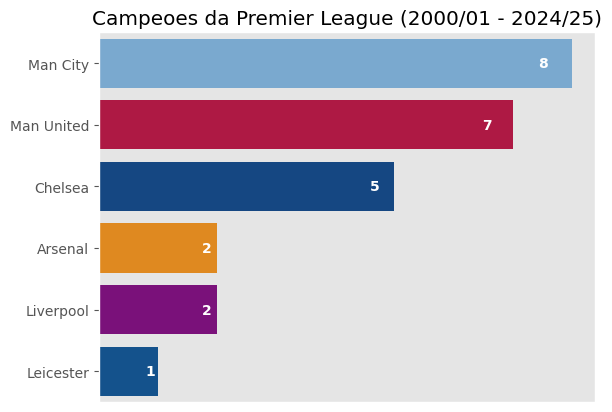

In [70]:
palette = {
    'Man City':    '#6CABDD',  
    'Man United':  '#C70039',  
    'Chelsea':     '#034694',  
    'Arsenal':     '#FF8C00',  
    'Liverpool':   '#8B008B',  
    'Leicester':   '#0053A0'   
}

ax = sns.barplot(x=champs_counts.values, y=champs_counts.index, palette=palette)
plt.title('Campeoes da Premier League (2000/01 - 2024/25)')
plt.xlabel('')
plt.ylabel('')
plt.xticks([]) 

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height()/2 
    ax.text(
            width*0.95,    
            y, 
            f'{int(width)}', 
            ha='right',    
            va='center', 
            color='white',
            fontsize=10,
            fontweight='bold'
        )


plt.savefig("champs_epl.svg", dpi=400)

Um ponto interessante sobre os campeões da Premier League é que o time Manchester City é o maior campeão dentro do período analisado, entretanto, seus títulos são todos a partir da temporada 2011/2012, ou seja, nos últimos 15 anos, o Manchester City foi campeão 8 vezes (mais de 50% dos campeonatos). Essas conquistas podem ser atríbuidas a contrações importantes do clube como a do atacante Sergio Agüero em 2011, a do técnico Pep Guardiola em 2016 e a do atacante Eerling Haaland em 2019.

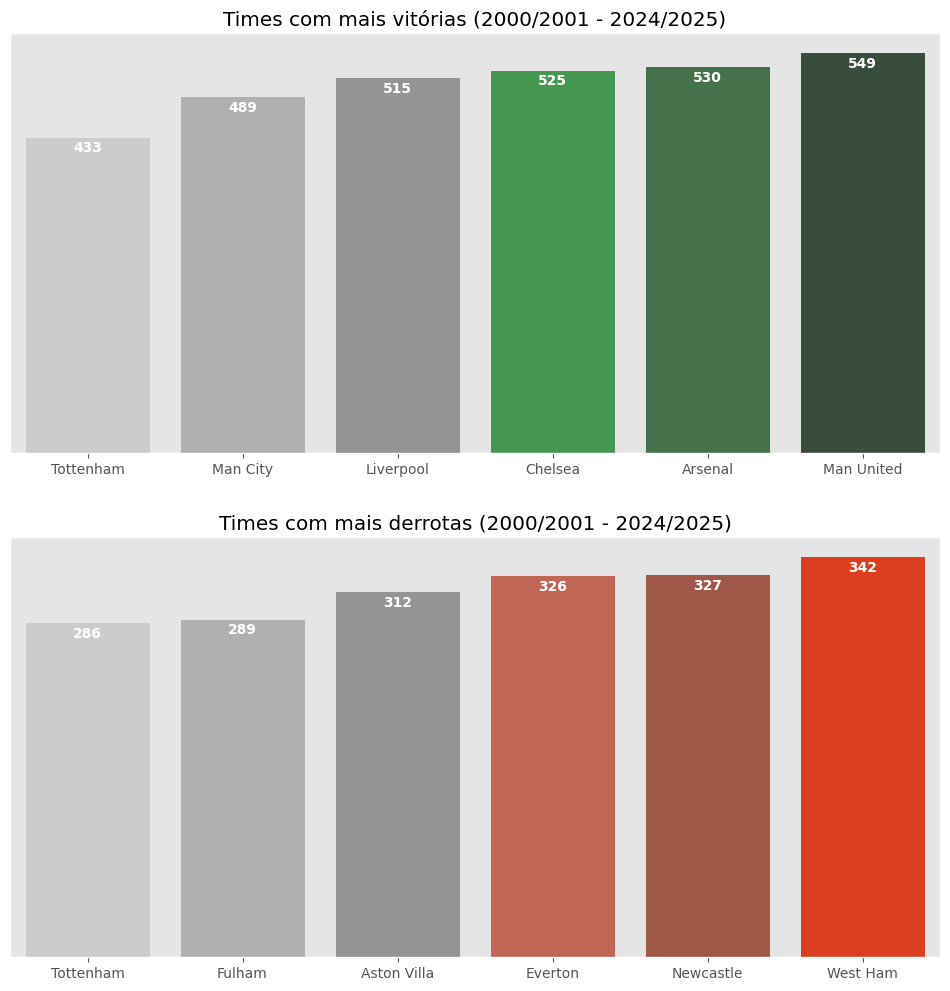

In [68]:
six_most_wins = stats.groupby('team')['wins'].sum().sort_values(ascending = True).reset_index().tail(6)
six_most_losses = stats.groupby('team')['losses'].sum().sort_values(ascending = True).reset_index().tail(6)

six_most_wins

fig, axes = plt.subplots(2, 1, figsize = (12, 12))

palette_wins = [
    '#CCCCCC',
    '#B0B0B0',
    '#949494',
    '#37A544',
    '#3D7A44',
    '#355038'
]

palette_looses = [
    '#CCCCCC',
    '#B0B0B0',
    '#949494',
    '#D15A43',
    '#AD4D3A',
    '#FA2A00'
]

wins = sns.barplot(data=six_most_wins, x='team', y='wins', palette=palette_wins, ax=axes[0])
wins.set_title('Times com mais vitórias (2000/2001 - 2024/2025)')
wins.set_xlabel('')
wins.set_ylabel('')
wins.set_yticks([])

for bar in wins.patches:
    h = bar.get_height() * 0.99
    x = bar.get_x() + bar.get_width() / 2 
    wins.text(
        x,            
        h,      
        f'{int(h)}',
        ha='center', va='top',
        fontweight='bold',
        color='white'
    )

losses = sns.barplot(data=six_most_losses, x='team', y='losses', palette=palette_looses, ax=axes[1])
losses.set_title('Times com mais derrotas (2000/2001 - 2024/2025)')
losses.set_xlabel('')
losses.set_ylabel('')
losses.set_yticks([])

for bar in losses.patches:
    h = bar.get_height() * 0.99
    x = bar.get_x() + bar.get_width() / 2
    losses.text(
        x,            
        h,      
        f'{int(h)}',
        ha='center', va='top',
        fontweight='bold',
        color='white'
    )

plt.savefig("wins_and_losses.svg", dpi=400)

Apesar de ser o time mais vitorioso da principal divisão da liga inglesa de futebol, o Manchester City não é o time com mais vitórias totais durante a competição (figura na quinta posição com 489 vitórias). O time mais vitorioso por sua vez, é o Manchester United (segundo em campeonatos ganhos) seguido por Arsenal e Chelsea.

Já para os times que mais perderam partidas no Premier League, West Ham, Everton e Newcastle aparecem como os principais dessa lista.

In [57]:
seasons_before_aguero = ['2000/01', '2001/02', '2002/03', '2004/05', '2006/07', '2007/08', '2008/09', '2010/11']

seasons_before_hirings = stats[(stats['Season'].isin(seasons_before_aguero)) & (stats['team'] == 'Man City')]
seasons_after_hirings = stats[(~stats['Season'].isin(seasons_before_aguero)) & (stats['team'] == 'Man City')]

mean_wins_bf = seasons_before_hirings['wins'].mean()
mean_losses_bf = seasons_before_hirings['losses'].mean()

mean_wins_af = seasons_after_hirings['wins'].mean()
mean_losses_af = seasons_after_hirings['losses'].mean()

print(f'''Antes das contratações de peso para o clube que começaram a partir da temporada 2010/11, 
a média de vitória do time era de {mean_wins_bf:.2f} vitórias e {mean_losses_bf:.2f} derrotas por temporada. Entretanto,
após contratação de Sergio Aguero e de outros jogadores para o clube, o time passou a ter uma média de
{mean_wins_af:.2f} vitórias e {mean_losses_af:.2f} derrotas''')

Antes das contratações de peso para o clube que começaram a partir da temporada 2010/11, 
a média de vitória do time era de 14.00 vitórias e 15.29 derrotas por temporada. Entretanto,
após contratação de Sergio Aguero e de outros jogadores para o clube o time passou a ter uma média de
23.29 vitórias e 7.12 derrotas


In [51]:
stats['wins'].describe()

count    502.000000
mean      13.976096
std        6.146208
min        0.000000
25%       10.000000
50%       13.000000
75%       18.000000
max       32.000000
Name: wins, dtype: float64

In [49]:
stats['losses'].describe()

count    502.000000
mean      13.976096
std        5.751631
min        0.000000
25%       10.000000
50%       15.000000
75%       18.000000
max       29.000000
Name: losses, dtype: float64

Outro ponto importante, é que em média, os times vencem e perdem em média 13 partidas por jogo

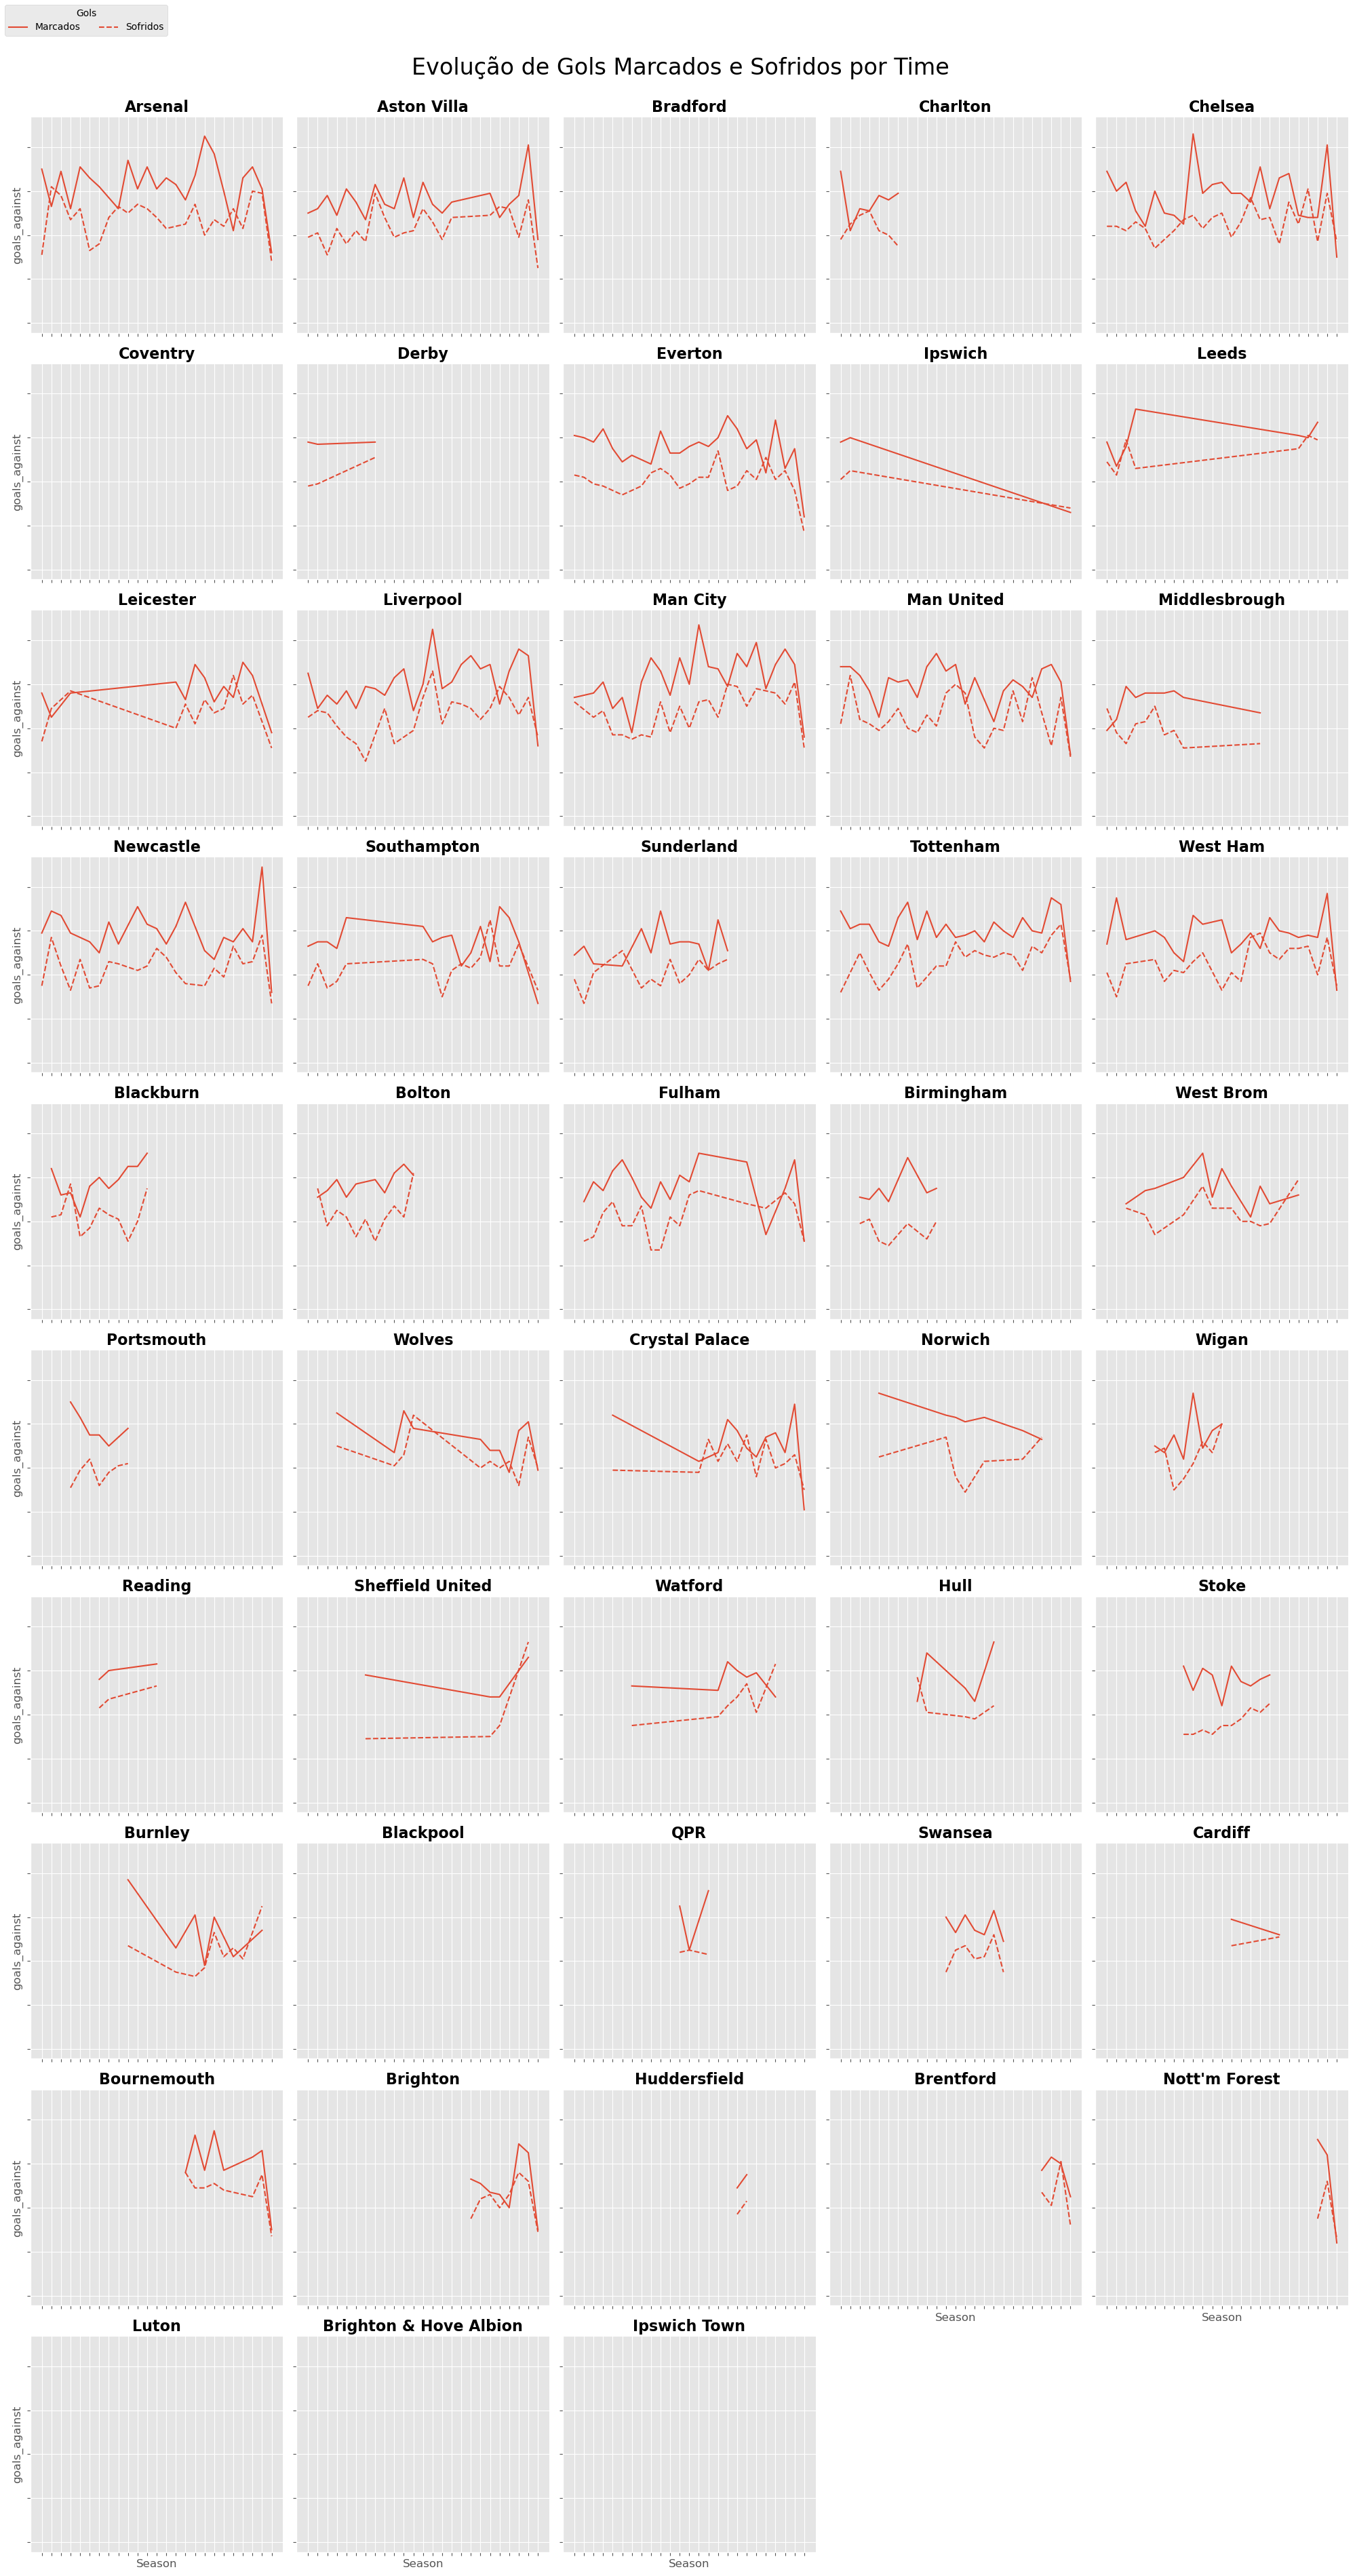

In [72]:
stats['off_ratio'] = stats['avg_goals'] / stats['avg_home_shots']
stats['def_ratio'] = stats['avg_goals_against'] / stats['avg_shots_against']


g = sns.FacetGrid(stats, col='team', col_wrap=5, height=4, sharey=True)
g.map_dataframe(sns.lineplot, x='Season', y='goals', label='Marcados')
g.map_dataframe(sns.lineplot, x='Season', y='goals_against', label='Sofridos', linestyle='--')

handles, labels = g.axes[0].get_legend_handles_labels()

for ax in g.axes.flat:
    ax.tick_params(labelbottom=False, labelleft=False)

g.fig.legend(handles, labels, 
             loc='upper left',  
             ncol=2,              
             frameon=True,
             fontsize=10,
             title='Gols') 


g.fig.suptitle("Evolução de Gols Marcados e Sofridos por Time", 
               fontsize=24,    
               y=0.98)         

g.set_titles(col_template='{col_name}', 
             size=16,                    
             fontweight='bold')  


# rect = [esquerda, bottom, direita, top]
g.fig.tight_layout(rect=[0, 0.05, 1, 0.98])


plt.savefig("off_def_ration.svg", dpi=400)

Com os gráficos é possível mensurar possíveis períodos de "glória" para os times como o Manchester City, que se notarmos possui picos de eficiência ofensiva correspondentes aos períodos de campeão. Além disso, pode se observar possíveis períodos de instabilidade nos times, como o Manchester United que possui picos e quedas na sua eficiência defensiva e ofensiva.

#### Períodos de Seca

In [45]:
champs['uuindex'] = [i for i in range(champs.shape[0])]

champs

,team,wins,draws,losses,goals,goals_against,avg_goals,avg_goals_against,avg_home_shots,avg_shots_against,avg_home_sot,avg_away_sot,points,goals_dif,uuindex
Season,,,,,,,,,,,,,,,
2000/01,Man United,24,8,6,68,42,1.789474,1.105263,13.842105,9.605263,6.210526,4.526316,80,26,0
2001/02,Arsenal,26,9,3,53,62,1.394737,1.631579,12.236842,8.289474,5.631579,4.210526,87,-9,1
2002/03,Man United,25,8,5,64,44,1.684211,1.157895,13.210526,9.921053,7.026316,5.421053,83,20,2
2003/04,Arsenal,26,12,0,52,47,1.368421,1.236842,11.868421,9.131579,6.552632,4.947368,90,5,3
2004/05,Chelsea,29,8,1,44,43,1.157895,1.131579,11.842105,9.815789,6.210526,5.500000,95,1,4
2005/06,Chelsea,29,4,5,60,34,1.578947,0.894737,10.868421,9.578947,5.763158,4.868421,91,26,5
2006/07,Man United,28,5,5,61,49,1.605263,1.289474,14.315789,11.447368,7.657895,5.973684,89,12,6
2007/08,Man United,27,6,5,62,40,1.631579,1.052632,14.736842,11.342105,8.315789,6.052632,87,22,7
2008/09,Man United,28,6,4,54,38,1.421053,1.000000,14.868421,11.157895,8.710526,6.263158,90,16,8


In [131]:
teams = champs['team'].tolist()
n = len(teams)


last_win = {}
max_gap  = {}


for idx, team in enumerate(teams):
    if team in last_win:
        gap = idx - last_win[team] - 1
        max_gap[team] = max(max_gap[team], gap)
    else:
        max_gap[team] = idx

    last_win[team] = idx


for team, last_idx in last_win.items():
    trailing = (n - 1) - last_idx
    max_gap[team] = max(max_gap[team], trailing)


for team in ['Man United','Arsenal','Chelsea','Man City','Leicester','Liverpool']:
    print(f"{team:12s}: {max_gap[team]} temporadas sem título")


Man United  : 12 temporadas sem título
Arsenal     : 21 temporadas sem título
Chelsea     : 8 temporadas sem título
Man City    : 11 temporadas sem título
Leicester   : 15 temporadas sem título
Liverpool   : 19 temporadas sem título


O período de maior seca foi a do Arsenal, afinal, durante o período analisado, o time ganhou a competição apenas uma vez, na temporada 2001/2002. Já o time que possui a menor quantidade de "gap" entre um título e outro é o Chelsea (terceiro colocado quando se trata de campeonatos ganhos).

### Insights

1. Apesar das estatísticas semelhantes, em muitas vezes, divergindo em décimos, os times mandantes na English Premier League obtém superiodade em partidas ganhas. Esse fator pode vir a explicar fatores comportamentais como influência da torcida, tipo de gramado e a familiaridade dos jogadores com o mesmo e outros fatores.
2. Os times mandantes e visitantes possuem similiridade em quantidade de gols por partida (em média 1.53 e 1.17), já em cartões amarelos, times visitantes tendem a receber mais vezes, não havendo significativa diferença entre a quantidade de cartões vermelhos e amarelos dados aos diferentes grupos de times.
3. O time mais vezes campeão da Premier League foi o Manchester City. Um ponto interessante é que a primeira vitória do time durante período analisado foi na temporada 2011/12 e, desde então, o time ganhou mais de 50% dos campeonatos disputados. Um fator importante foram as contrações cruciais e essenciais para o time, que contribuiram não só para títulos, mas para um aumento de 60% na taxa de vitória do time nas temporadas.
4. Apesar de ter mais campeonatos ganhos o Manchester City não é o time mais vitorioso dentro do período analisado. Esta posição é ocupada pelo rival e time da mesma cidade Manchester United (segundo colocado em campeonatos ganhos) que desde da temporada 2010/11 não é campeão e vem enfrentando períodos de instabilidade, evidenciados pela sua eficiência ofensiva/defensiva.